<a href="https://colab.research.google.com/github/xtianu/temporal_DAPR/blob/main/Example_2_PCA_on_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EXAMPLE 2:** PCA on images
> FACES



Explanation:

    Comparison Plot: The function plot_faces_comparison generates a side-by-side comparison of the original and reconstructed images. For each face, the original image is shown in the first row, and its PCA-reconstructed counterpart is shown directly below in the second row.
    Figure Layout: We use a grid layout to display multiple faces (in this case, 10 faces), allowing you to easily compare the quality of the reconstructions.

Output:

The output will display two rows:

    Top row: Shows the original face images.
    Bottom row: Shows the PCA-reconstructed images after reducing the data to 100 principal components.

Key Parameter:

    n_components = 100: You can experiment with this value by reducing or increasing the number of principal components to see how it affects the quality of the reconstructed images. Fewer components will lead to more compression and blur, while more components will better retain the original details.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_olivetti_faces
from sklearn.preprocessing import StandardScaler

# Dataset: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_olivetti_faces.html

In [4]:
# Reshape the original and reconstructed images to 64x64 for visualization
def plot_faces_comparison(original_images, reconstructed_images, h=64, w=64, n_row=2, n_col=5):
    plt.figure(figsize=(1.8 * n_col, 4.8 * n_row))  # Adjust figure size for both original and reconstructed
    plt.suptitle(f'Original vs Reconstructed Faces ({n_components} components)', size=16)

    for i in range(n_row * n_col):
        # Plot original faces
        plt.subplot(2 * n_row, n_col, i + 1)
        plt.imshow(original_images[i].reshape((h, w)), cmap='gray')
        plt.xticks(())
        plt.yticks(())
        if i == 0:
            plt.title('Original Faces', size=12)

        # Plot reconstructed faces
        plt.subplot(2 * n_row, n_col, i + 1 + n_row * n_col)
        plt.imshow(reconstructed_images[i].reshape((h, w)), cmap='gray')
        plt.xticks(())
        plt.yticks(())
        if i == 0:
            plt.title(f'Reconstructed Faces ({n_components} components)', size=12)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [5]:
# Plot explained variance for each principal component (Scree Plot)
def plot_pca_variance(pca):
    plt.figure(figsize=(8, 6))

    # Plot explained variance ratio
    plt.bar(range(1, n_components+1), pca.explained_variance_ratio_, alpha=0.5, align='center', label='Individual Explained Variance')

    # Plot cumulative explained variance
    plt.step(range(1, n_components+1), np.cumsum(pca.explained_variance_ratio_), where='mid', label='Cumulative Explained Variance')

    plt.xlabel('Principal Components')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Explained Variance by Principal Components')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

In [6]:
# Load the Olivetti faces dataset
faces = fetch_olivetti_faces(shuffle=True, random_state=42)
X = faces.data  # Each row is a flattened image (64x64 = 4096 features)
n_samples, n_features = X.shape

# Standardize the data (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
n_components = 100  # Reduce to 100 components
pca = PCA(n_components=n_components, whiten=True)
X_pca = pca.fit_transform(X_scaled)

# Inverse transform the PCA-reduced data back to the original space
X_reconstructed = pca.inverse_transform(X_pca)


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


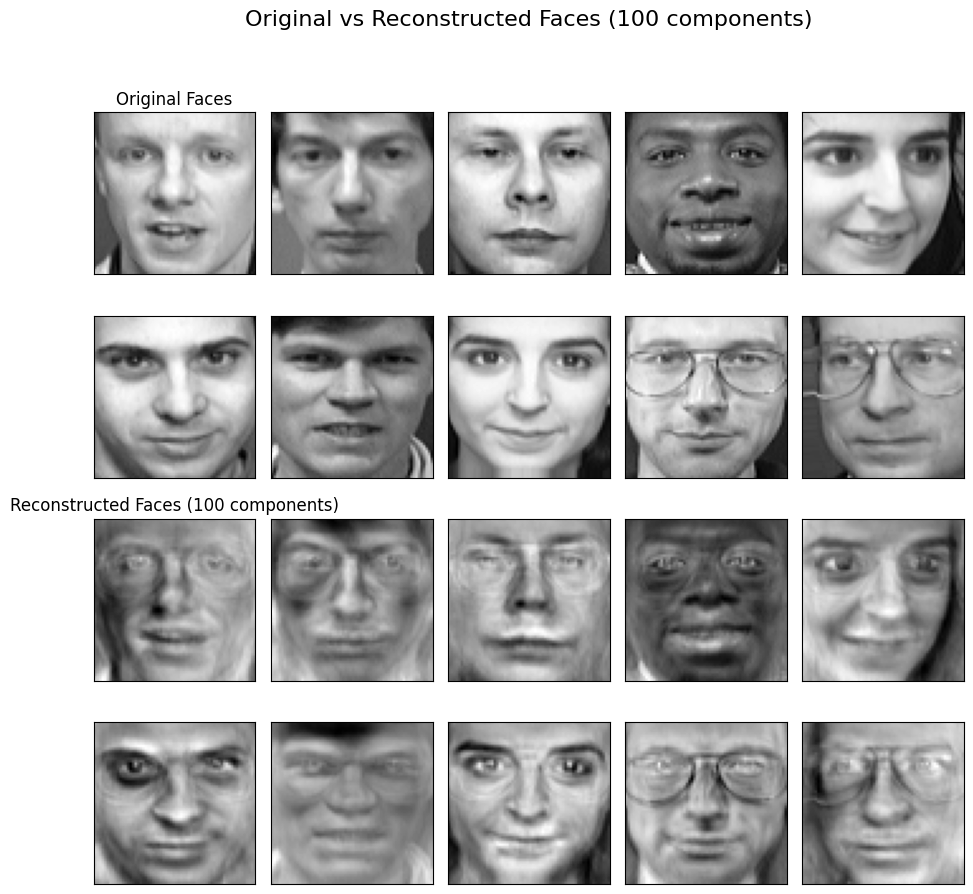

In [7]:
# Show side-by-side comparison of original and reconstructed images
plot_faces_comparison(X[:10], X_reconstructed[:10])

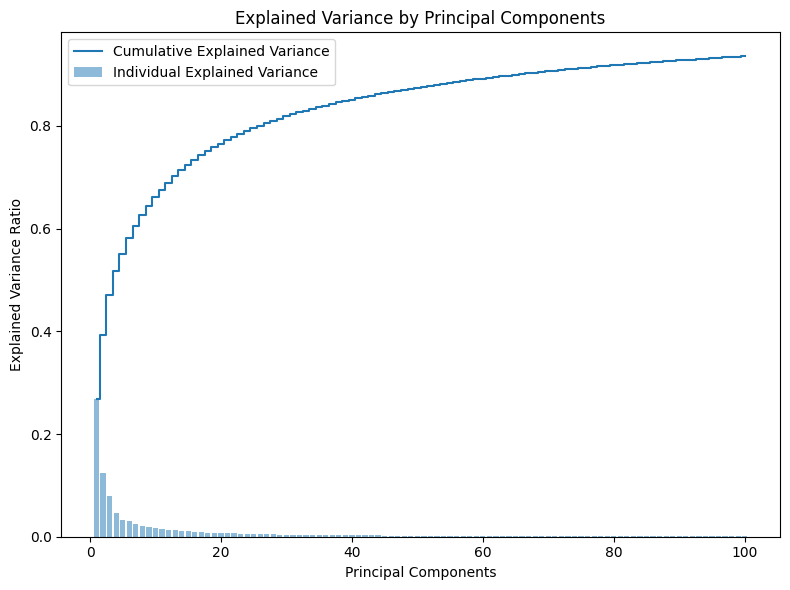

In [8]:
# Call the function to plot the explained variance
plot_pca_variance(pca)


**Interpreting the Plot:**

If the first few components explain a significant portion of the variance (e.g., 80-90%), you can confidently reduce the dataset's dimensionality to that number of components without losing too much information.

In many cases, after a certain point, adding more components doesn't contribute much to the cumulative variance (the plot flattens), indicating diminishing returns.